# 基本原理

残差网络最早由何凯明等人在2015年提出，其核心思想是通过引入残差连接（residual connection）来解决深层网络的训练问题。在传统的神经网络中，每一层的输出都来自于前一层的输出。而在残差网络中，每一层的输出是由前一层的输出与该层的输入之和得到的。这个残差连接可以被看作是一个跳跃连接，将前一层的信息直接传递给后面的层。这种设计使得网络可以更轻松地学习到恒等映射，从而提高了网络的性能。

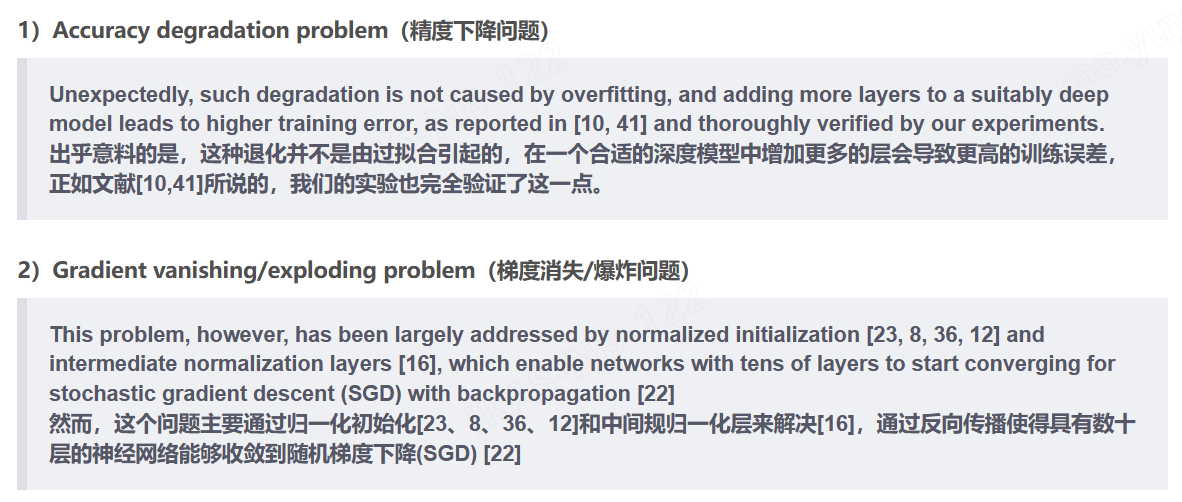

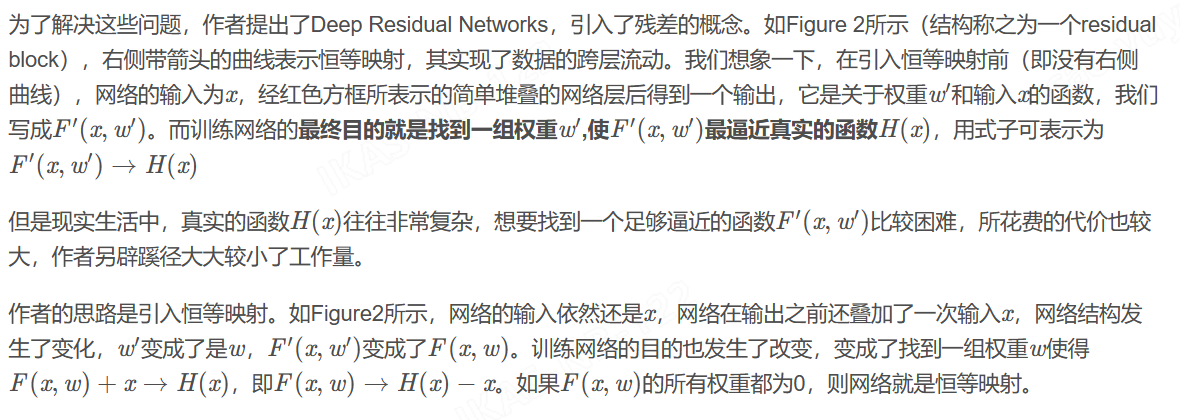

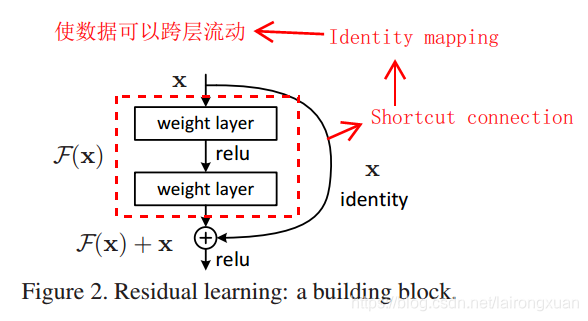

残差网络的优势
- 解决梯度消失问题：在深层网络中，梯度消失是一个常见的问题，使得网络无法有效地进行训练。通过引入残差连接，梯度可以更轻松地传播到较浅的层，从而解决了梯度消失问题。
- 提高网络性能：残差连接允许网络直接学习恒等映射，使得网络可以更有效地逼近目标函数。这种设计可以提高网络的性能，特别是在网络较深时。
- 更容易训练：相对于传统的深层网络，残差网络更容易训练。由于梯度可以更好地传播，网络的收敛速度更快，训练过程更稳定。

残差网络的应用
残差网络已经在各种深度学习任务中取得了显著的成果。以下是一些常见的应用：

- 图像分类：残差网络在图像分类任务中被广泛使用。通过堆叠多个残差块，可以构建非常深的网络，并在图像分类竞赛中取得了领先的性能。
- 目标检测：残差网络也被应用于目标检测任务中。通过在主干网络中插入残差块，可以提高网络对目标的感知能力，并改善目标检测的准确性和稳定性。
- 语音识别：在语音识别领域，残差网络也取得了很好的效果。通过使用残差连接，网络可以更好地处理长时序列数据，并提高语音识别的性能。

## 示例代码

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
# 定义残差块
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.relu(out)
        out = self.conv2(out)
        out += residual  # 残差连接
        out = self.relu(out)
        return out
# 定义残差网络模型
class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.residual_block1 = ResidualBlock(64, 64)
        self.residual_block2 = ResidualBlock(64, 64)
        self.residual_block3 = ResidualBlock(64, 64)
        self.fc = nn.Linear(64, num_classes)
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.residual_block1(out)
        out = self.residual_block2(out)
        out = self.residual_block3(out)
        out = nn.functional.avg_pool2d(out, 8)  # 平均池化
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
# 实例化模型
model = ResNet(num_classes=10)
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# 训练模型
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

NameError: name 'train_loader' is not defined